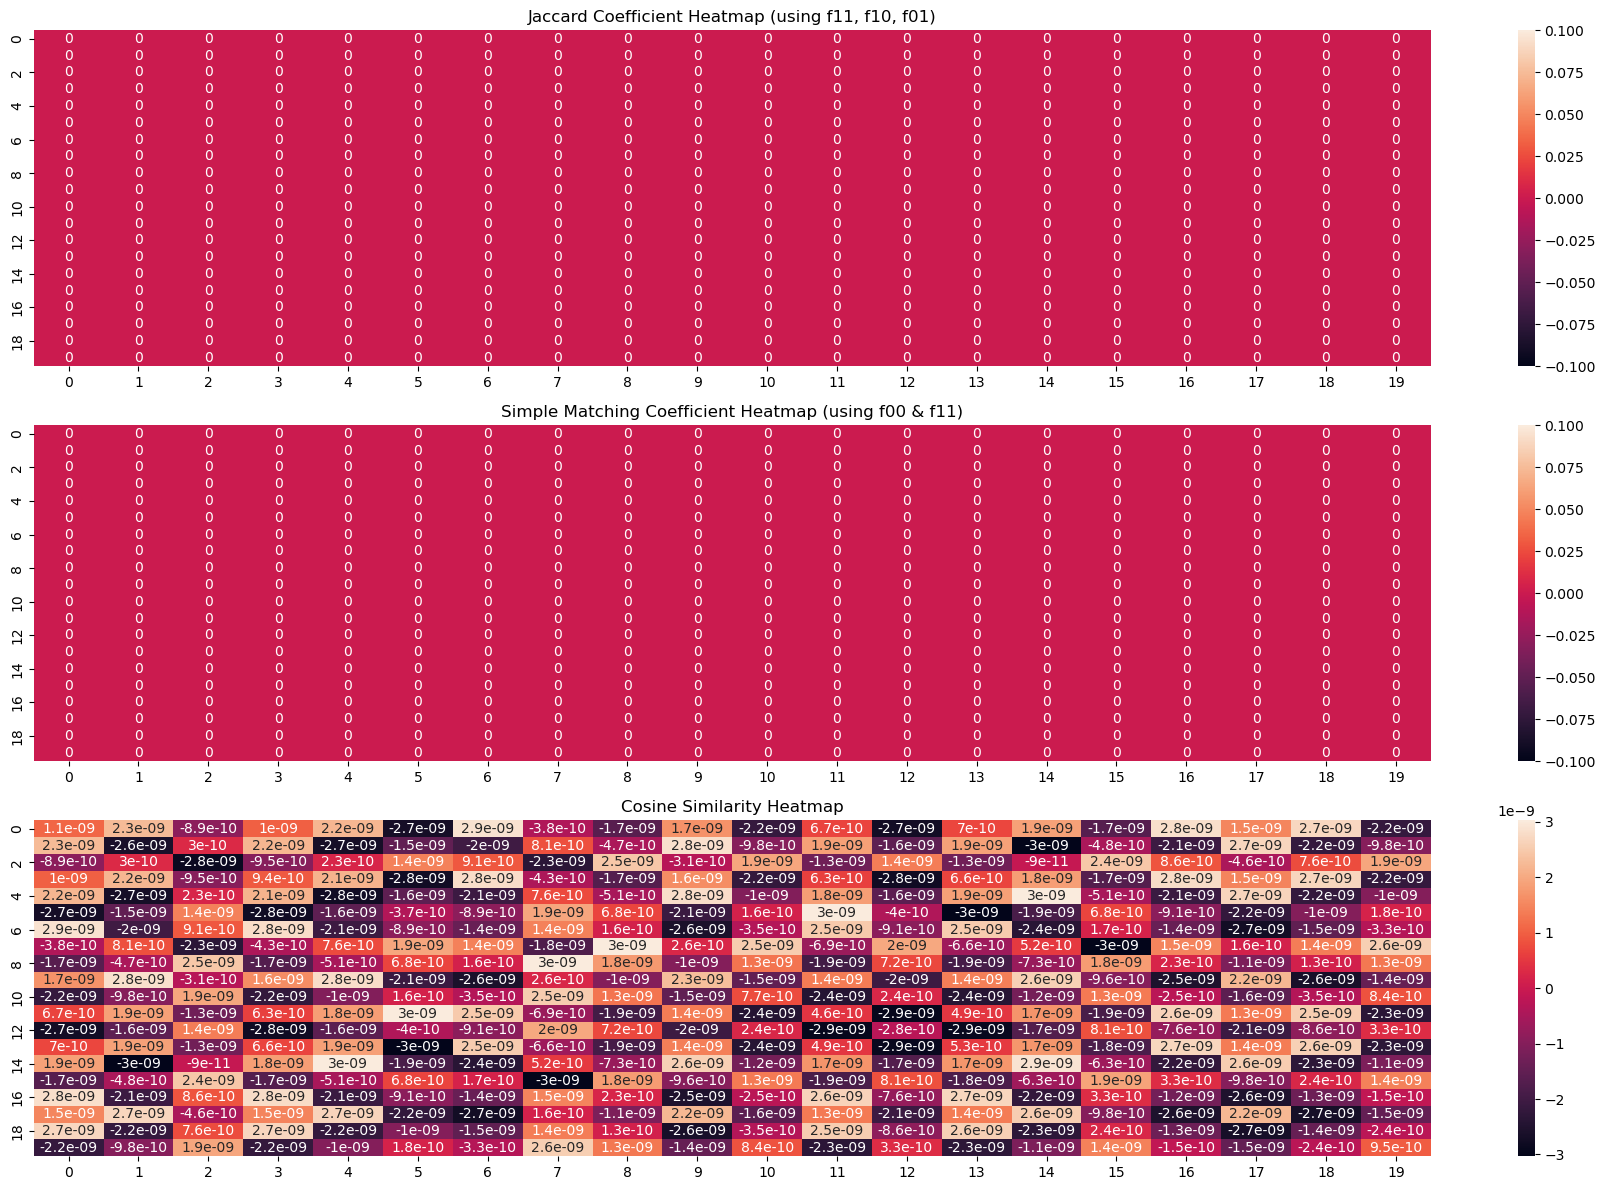

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")

numeric_data = df.select_dtypes(include=[np.number]).dropna()
data = numeric_data.iloc[:20].astype(int).values 
n = data.shape[0]

# Initialize matrices
jc_matrix = np.zeros((n, n))
smc_matrix = np.zeros((n, n))
cos_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        a = data[i]
        b = data[j]

        f11 = np.sum((a == 1) & (b == 1))
        f00 = np.sum((a == 0) & (b == 0))
        f10 = np.sum((a == 1) & (b == 0))
        f01 = np.sum((a == 0) & (b == 1))

        #jacard
        denominator = f11 + f10 + f01
        jc_matrix[i][j] = f11 / denominator if denominator != 0 else 0

        # SMC
        total = f11 + f10 + f01 + f00
        smc_matrix[i][j] = (f11 + f00) / total if total != 0 else 0

        # COSine similrities
        dot = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        cos_matrix[i][j] = dot / (norm_a * norm_b) if norm_a != 0 and norm_b != 0 else 0

# heatmasp entoned in the questions
plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
sns.heatmap(jc_matrix, annot=True)
plt.title("Jaccard Coefficient Heatmap (using f11, f10, f01)")

plt.subplot(3, 1, 2)
sns.heatmap(smc_matrix, annot=True)
plt.title("Simple Matching Coefficient Heatmap (using f00 & f11)")

plt.subplot(3, 1, 3)
sns.heatmap(cos_matrix, annot=True)
plt.title("Cosine Similarity Heatmap")

plt.tight_layout()
plt.show()
